In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Amity Notes/Amity/Notes/Data Visualtiation/Sample_Superstores.csv", encoding='latin1')

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/6/2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Convert 'Order Date' column to datetime format with proper error handling
try:
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="raise")
except Exception as e:
    print(f"Error converting 'Order Date' to datetime: {e}")
    # Optionally provide a fallback or additional error handling

Error converting 'Order Date' to datetime: time data "15-04-2017" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

In [14]:
df['Order Date'] = df['Order Date'].dt.strftime('%d-%m-%Y')

# sales by category

In [35]:
cat_sales = df.groupby('Category')['Sales'].sum()
print(cat_sales)

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


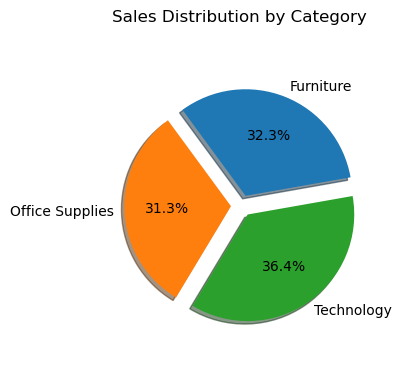

In [36]:
plt.figure(figsize=(4,4))
explode = (0.1,0.1,0.1)
plt.pie(
    cat_sales,
    labels=cat_sales.index,  
    autopct='%1.1f%%',      
    startangle=10,          
    shadow=True,explode = explode 
)
plt.axis('equal')            
plt.title('Sales Distribution by Category')
plt.tight_layout()

# Sales in regions

In [37]:
region_sales = df.groupby('Region')['Sales'].sum()
print(region_sales)

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


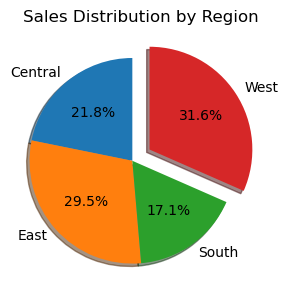

In [38]:
plt.figure(figsize=(3,3))
explode = (0,0,0,0.2)
plt.pie(
   region_sales,
    labels=region_sales.index,  
    autopct='%1.1f%%',      
    startangle=90,          
    shadow=True, explode=explode
)
plt.axis('equal')            
plt.title('Sales Distribution by Region')
plt.tight_layout()

# state sales 

In [39]:
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

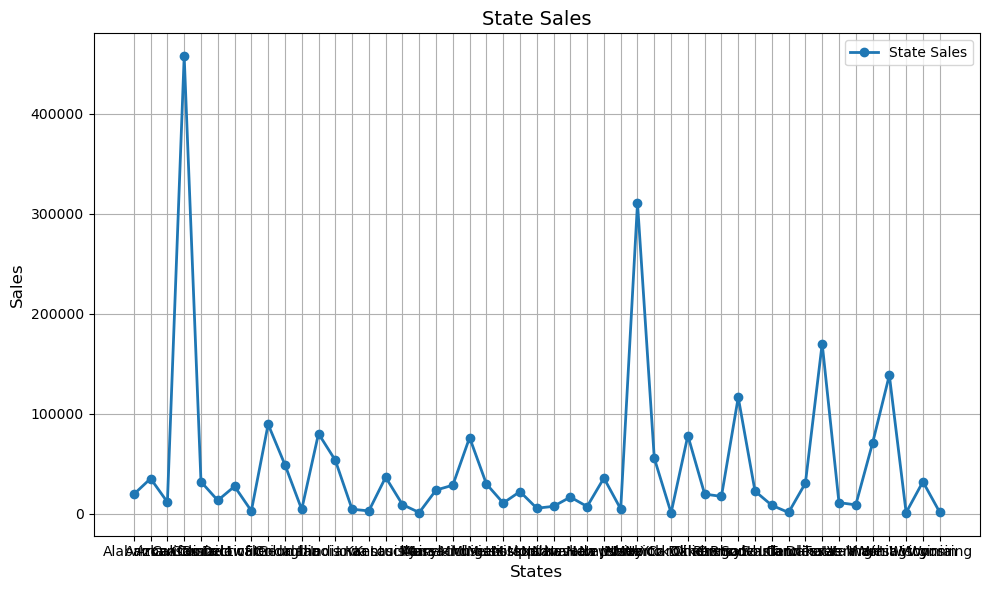

In [40]:
# Create a clear, well-labeled plot
plt.figure(figsize=(10, 6))  # Set appropriate figure size
plt.plot(state_sales, marker='o', linestyle='-', linewidth=2, label='State Sales')
plt.title('State Sales', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# category profit

In [41]:
cat_profit = df.groupby('Category')['Profit'].sum()
print(cat_profit)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


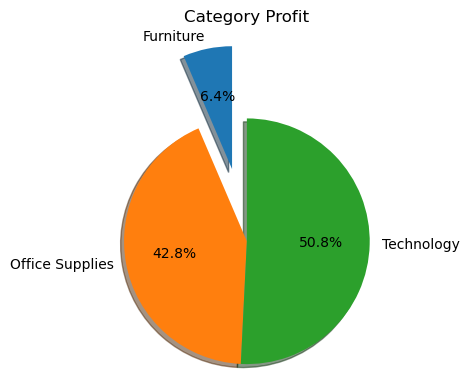

In [42]:
plt.figure(figsize=(4,4))
explode = (0.6,0,0)
plt.pie(
   cat_profit,
    labels=cat_profit.index,  
    autopct='%1.1f%%',      
    startangle=90,          
    shadow=True, explode=explode
)
plt.axis('equal')            
plt.title('Category Profit')
plt.tight_layout()

In [43]:
#

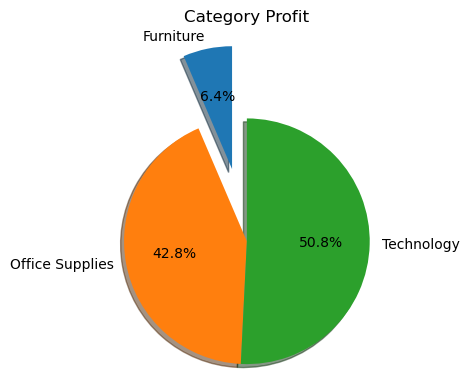

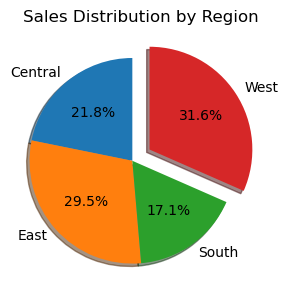

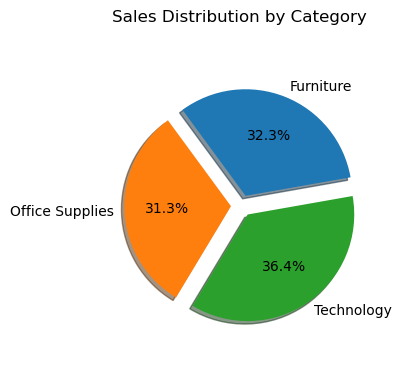

In [44]:
plt.figure(figsize=(4,4))
size = (0.6,0,0)
plt.pie(
   cat_profit,
    labels=cat_profit.index,  
    autopct='%1.1f%%',      
    startangle=90,          
    shadow=True, explode=size
)
plt.axis('equal')            
plt.title('Category Profit')
plt.tight_layout()

plt.figure(figsize=(3,3))
cut = (0,0,0,0.2)
plt.pie(
   region_sales,
    labels=region_sales.index,  
    autopct='%1.1f%%',      
    startangle=90,          
    shadow=True, explode=cut
)
plt.axis('equal')            
plt.title('Sales Distribution by Region')
plt.tight_layout()

plt.figure(figsize=(4,4))
explode = (0.1,0.1,0.1)
plt.pie(
    cat_sales,
    labels=cat_sales.index,  
    autopct='%1.1f%%',      
    startangle=10,          
    shadow=True,explode = explode 
)
plt.axis('equal')            
plt.title('Sales Distribution by Category')
plt.tight_layout()

In [45]:
df["Segment"]


0        Consumer
1        Consumer
2       Corporate
3        Consumer
4        Consumer
          ...    
9989     Consumer
9990     Consumer
9991     Consumer
9992     Consumer
9993     Consumer
Name: Segment, Length: 9994, dtype: object

# Profit in Regions

In [46]:
region_profit = df.groupby('Region')['Profit'].sum()
print(region_profit)

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64


Text(0.5, 1.0, 'Profit Distribution by Region')

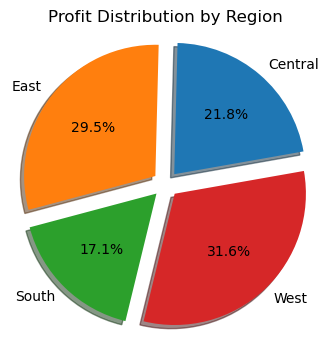

In [47]:
plt.figure(figsize=(4,4))
explode = (0.1,0.1,0.1,0.1)
plt.pie(
    region_sales,
    labels=region_sales.index,  
    autopct='%1.1f%%',      
    startangle=10,          
    shadow=True,explode = explode 
)
plt.axis('equal')            
plt.title('Profit Distribution by Region')

# Profit in States

In [48]:
state_profit = df.groupby('State')['Profit'].sum()
print(state_profit)

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

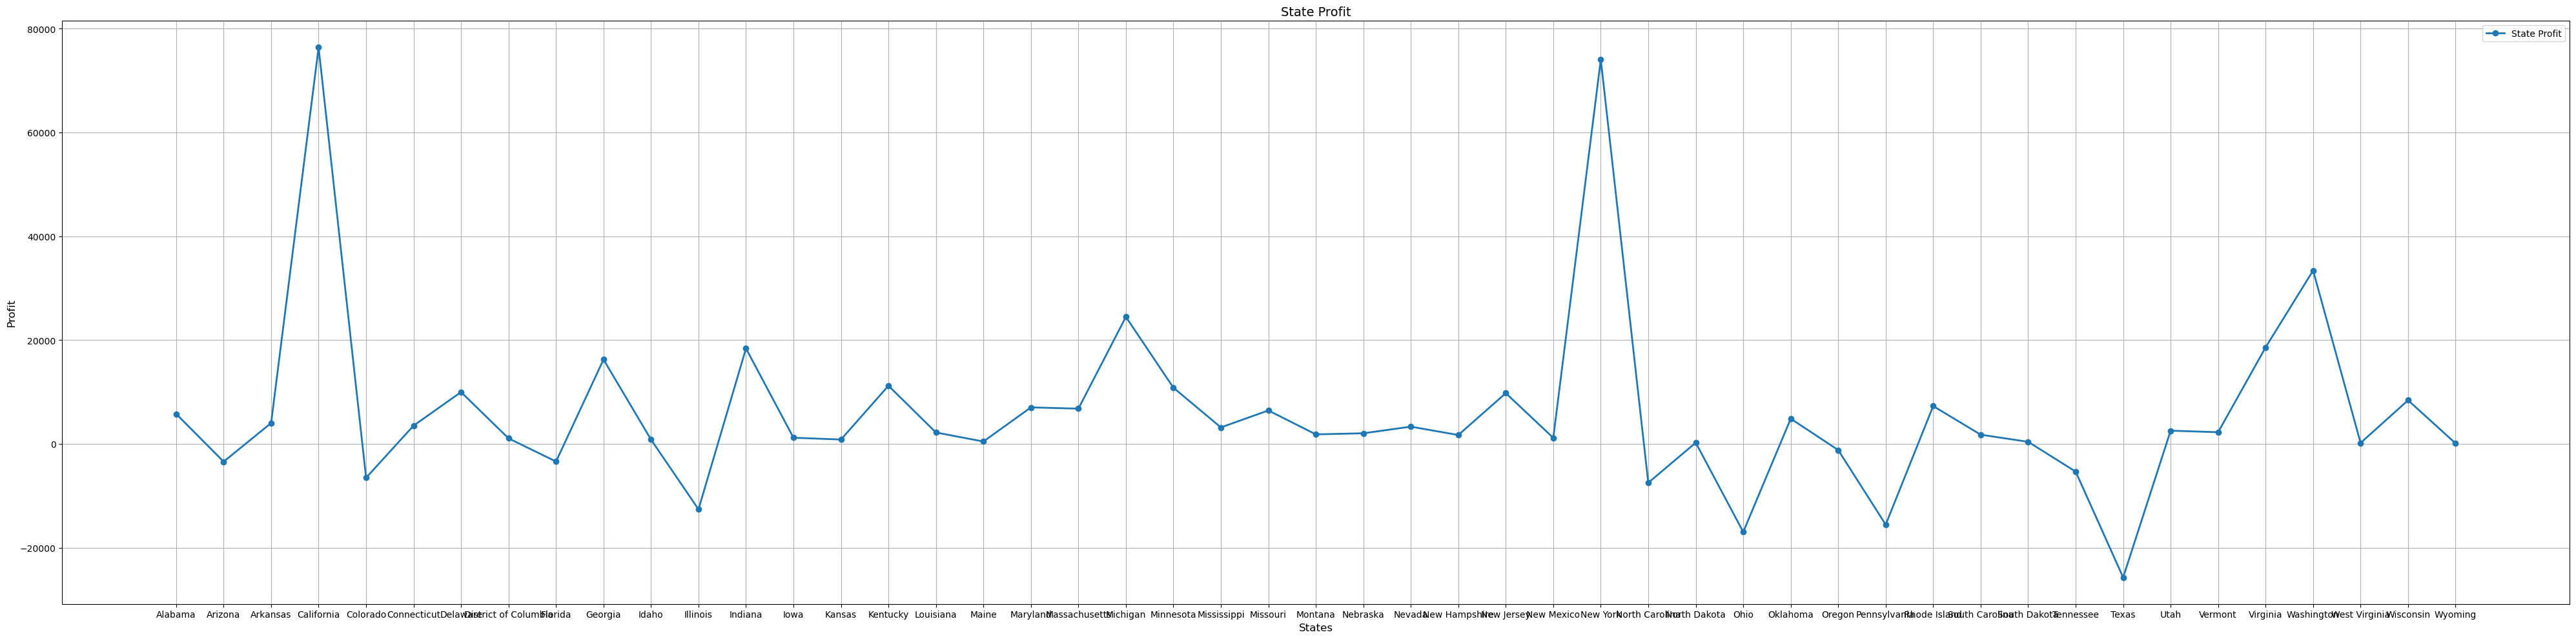

In [49]:
plt.figure(figsize=(40,10))  # Set appropriate figure size
plt.plot(state_profit, marker='o', linestyle='-', linewidth=2, label='State Profit')
plt.title('State Profit', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

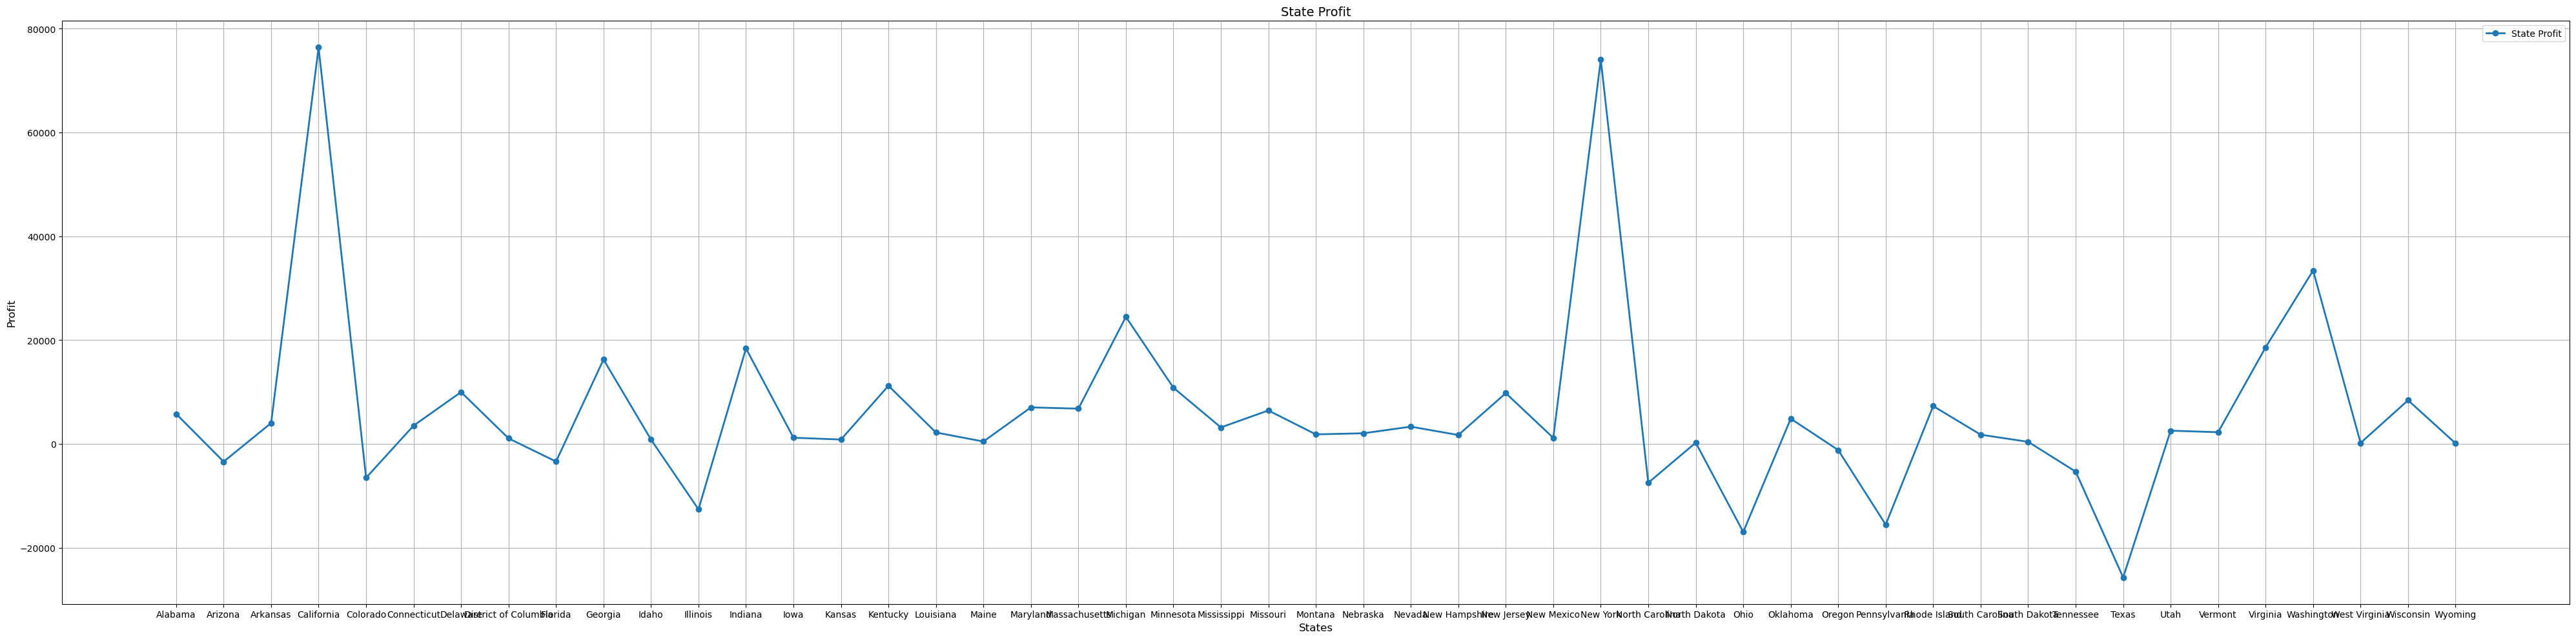

In [50]:
plt.figure(figsize=(40,10))  # Set appropriate figure size
plt.plot(state_profit, marker='o', linestyle='-', linewidth=2, label='State Profit')
plt.title('State Profit', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

In [51]:
prod_sales = df.groupby('Product Name')['Sales'].sum()
print(prod_sales)

Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [52]:
monthly_sales = df.groupby('Order Date')['Sales'].sum()
print(monthly_sales)

Order Date
2014-01-03      16.448
2014-01-04     288.060
2014-01-05      19.536
2014-01-06    4407.100
2014-01-07      87.158
                ...   
2017-12-07    2916.514
2017-12-08    7643.041
2017-12-09    5470.390
2017-12-10    3873.559
2017-12-11    2823.965
Name: Sales, Length: 483, dtype: float64


In [53]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)  # e.g., "2020-01"


In [54]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

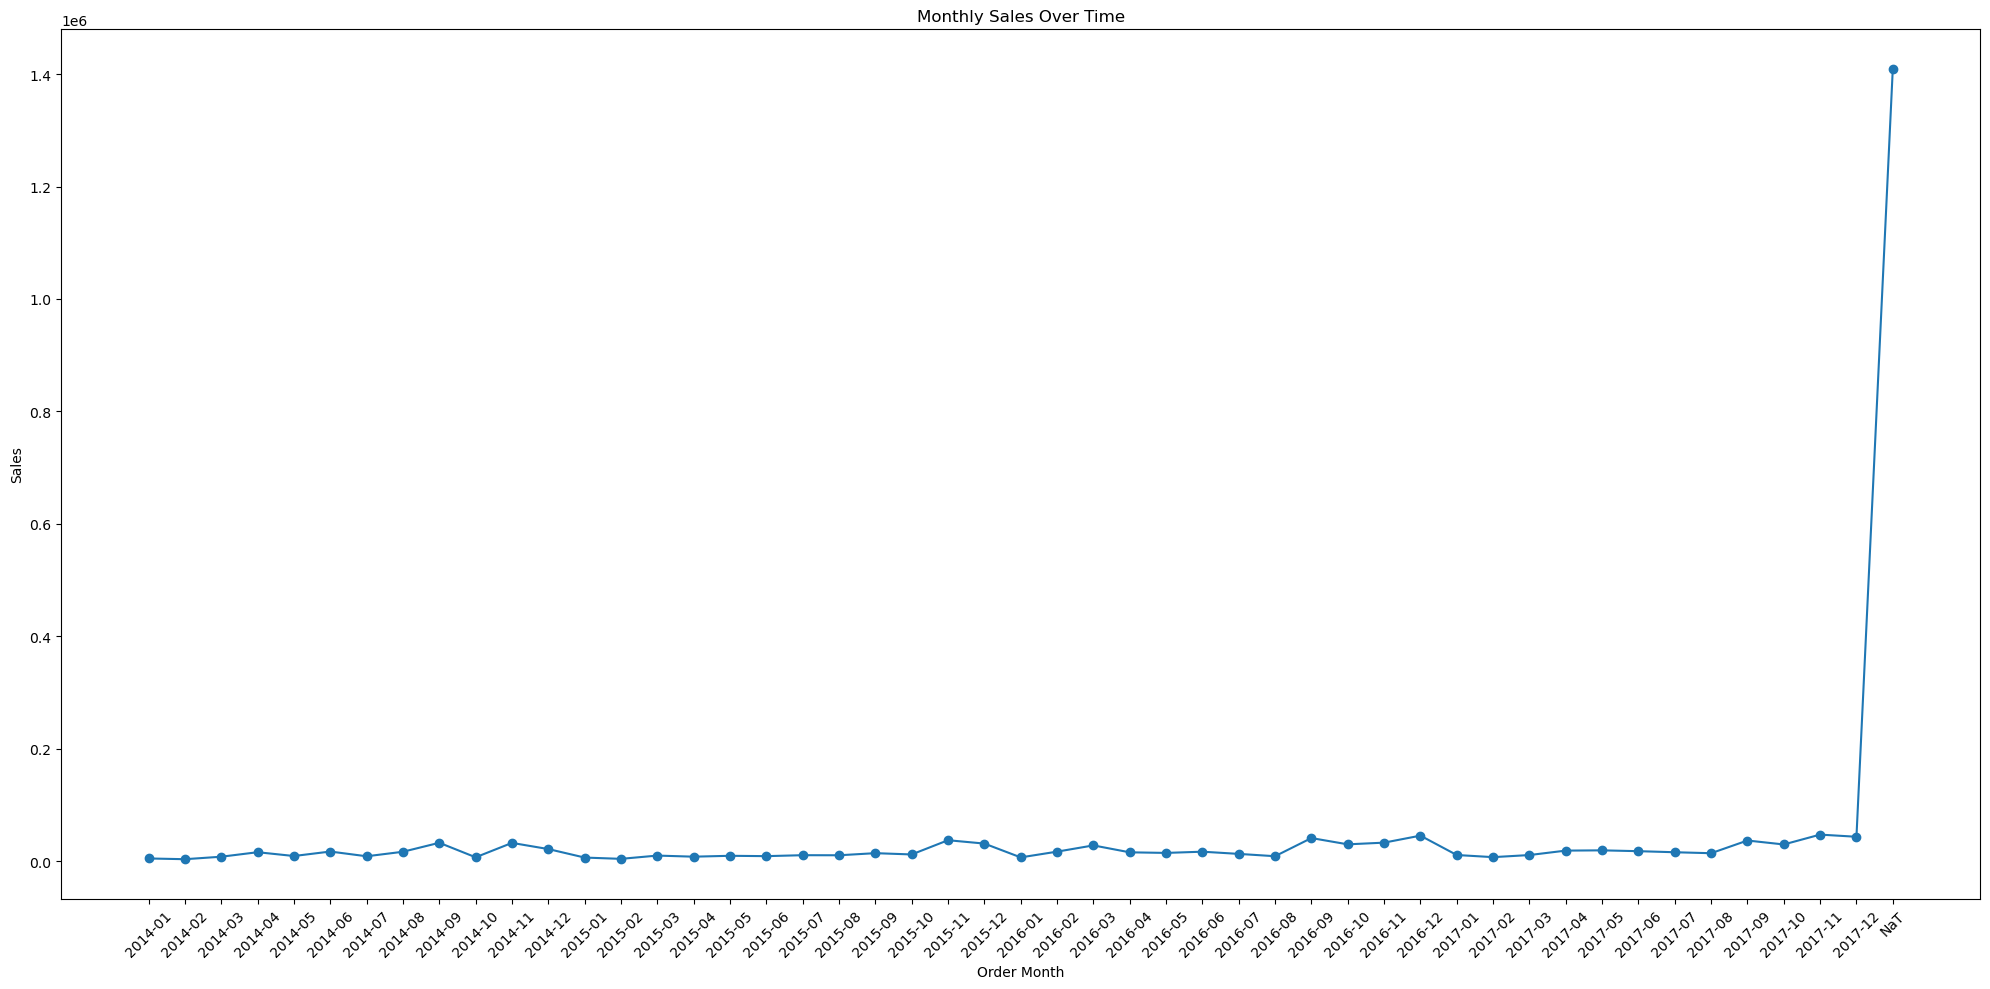

In [55]:
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Order Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Over Time")
plt.tight_layout()
plt.show()
